#                   Capstone Project 1: Employer Ratings Analysis

# Data Wrangling Steps:
The data has been acquired as a csv file from https://www.kaggle.com/petersunga/google-amazon-facebook-employee-reviews. It was created by web scraping over 67K employee reviews for employers such as Amazon, Apple, Google, Facebook, Microsoft and Netflix. The reviews were collected over a time span of 10 years (2009-2018).

In [1]:
# Import packages and read the csv file into a pandas DataFrame.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
emp_df = pd.read_csv('employee_reviews.csv')

In [2]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 17 columns):
Unnamed: 0                    67529 non-null int64
company                       67529 non-null object
location                      67529 non-null object
dates                         67529 non-null object
job-title                     67529 non-null object
summary                       67409 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
advice-to-mgmt                67232 non-null object
overall-ratings               67529 non-null float64
work-balance-stars            67529 non-null object
culture-values-stars          67529 non-null object
carrer-opportunities-stars    67529 non-null object
comp-benefit-stars            67529 non-null object
senior-mangemnet-stars        67529 non-null object
helpful-count                 67529 non-null int64
link                          67529 non-null object
dtypes: 

In [3]:
emp_df.head()

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


The dataset consists of 67529 observations with 17 columns. 

This is a real world dataset. Upon inspection, it was found that some of the critical columns had an incorrect value of none which would neither qualify as a null value nor a numeric value. Some of the columns were poorly labelled and/or misspelled. The date when the review was posted and all the ratings columns were stored as object datatype in the dataset.

The first step is to correctly label all the columns. 

In [4]:
emp_df = emp_df.rename(columns = {"job-title": "job_title", "advice-to-mgmt": "advice_to_mgmt", 
                                        "overall-ratings": "overall_ratings", "work-balance-stars": "work_balance_stars", 
                                        "culture-values-stars": "culture_values_stars", "helpful-count": "helpful_count",
                                        "carrer-opportunities-stars": "career_opportunities_stars",
                                        "comp-benefit-stars": "comp_benefit_stars", "senior-mangemnet-stars": "senior_management_stars"})

Next, we will check for null values in all columns. It would be also helpful to find the unique values in some of the columns for proper identification of nulls.

In [5]:
emp_df.isnull().sum()

Unnamed: 0                      0
company                         0
location                        0
dates                           0
job_title                       0
summary                       120
pros                            0
cons                            0
advice_to_mgmt                297
overall_ratings                 0
work_balance_stars              0
culture_values_stars            0
career_opportunities_stars      0
comp_benefit_stars              0
senior_management_stars         0
helpful_count                   0
link                            0
dtype: int64

In [6]:
emp_df['location'].unique()

array(['none', 'Mountain View, CA', 'New York, NY', ...,
       'Srinagar, Jammu and Kashmir (India)', 'Blackburn, England (UK)',
       'Pudong, Shanghai (China)'], dtype=object)

In [7]:
emp_df['culture_values_stars'].unique()

array(['5.0', '3.0', '4.0', 'none', '2.0', '1.0'], dtype=object)

In [8]:
# Some columns have “none” as value. So they do not qualify as missing value, even though they are null. 
# By replacing all “none” values with np.NaN, they can be identified as a null value.
emp_df2 = emp_df.replace(to_replace = 'none', value = np.NaN)
emp_df2.isnull().sum()

Unnamed: 0                        0
company                           0
location                      25085
dates                             0
job_title                         0
summary                         129
pros                              0
cons                              1
advice_to_mgmt                29461
overall_ratings                   0
work_balance_stars             7160
culture_values_stars          13546
career_opportunities_stars     7108
comp_benefit_stars             7161
senior_management_stars        7775
helpful_count                     0
link                              0
dtype: int64

In [9]:
# By replacing 'none' with np.NaN, we will see that several columns have missing values.
emp_df2.dtypes

Unnamed: 0                      int64
company                        object
location                       object
dates                          object
job_title                      object
summary                        object
pros                           object
cons                           object
advice_to_mgmt                 object
overall_ratings               float64
work_balance_stars             object
culture_values_stars           object
career_opportunities_stars     object
comp_benefit_stars             object
senior_management_stars        object
helpful_count                   int64
link                           object
dtype: object

The ratings columns (overall_ratings, work_balance_stars, culture_values_stars, career_opportunities_stars, comp_benefit_stars, senior_management_stars) are the most important variables in this project. In order to fill the missing values on them, they will be first converted from object datatype to float type. And then, the null values will be replaced with mean of the column.

In [10]:
emp_df2['work_balance_stars'] = emp_df2['work_balance_stars'].astype(str).astype(float)

wbs_mean = emp_df2['work_balance_stars'].mean()

emp_df2['work_balance_stars'] = emp_df2['work_balance_stars'].fillna(value=wbs_mean)

In [11]:
emp_df2['culture_values_stars'] = emp_df2['culture_values_stars'].astype(str).astype(float)

cvs_mean = emp_df2['culture_values_stars'].mean()

emp_df2['culture_values_stars'] = emp_df2['culture_values_stars'].fillna(value=cvs_mean)

In [12]:
emp_df2['career_opportunities_stars'] = emp_df2['career_opportunities_stars'].astype(str).astype(float)

cos_mean = emp_df2['career_opportunities_stars'].mean()

emp_df2['career_opportunities_stars'] = emp_df2['career_opportunities_stars'].fillna(value=cos_mean)

In [13]:
emp_df2['comp_benefit_stars'] = emp_df2['comp_benefit_stars'].astype(str).astype(float)

cbs_mean = emp_df2['comp_benefit_stars'].mean()

emp_df2['comp_benefit_stars'] = emp_df2['comp_benefit_stars'].fillna(value=cbs_mean)

In [14]:
emp_df2['senior_management_stars'] = emp_df2['senior_management_stars'].astype(str).astype(float)

sms_mean = emp_df2['senior_management_stars'].mean()

emp_df2['senior_management_stars'] = emp_df2['senior_management_stars'].fillna(value=sms_mean)

Since location is not a numerical column, it’s null values will be filled using ffill and bfill methods after sorting the dataset by company.

In [15]:
emp_df_sort = emp_df2.sort_values('company')
emp_df_sort['location'] = emp_df_sort['location'].fillna(method = 'bfill')

In [16]:
emp_df_sort.isnull().sum()

Unnamed: 0                        0
company                           0
location                          1
dates                             0
job_title                         0
summary                         129
pros                              0
cons                              1
advice_to_mgmt                29461
overall_ratings                   0
work_balance_stars                0
culture_values_stars              0
career_opportunities_stars        0
comp_benefit_stars                0
senior_management_stars           0
helpful_count                     0
link                              0
dtype: int64

In [17]:
emp_df_sort[emp_df_sort['location'].isnull()]

,Unnamed: 0,company,location,dates,job_title,summary,pros,cons,advice_to_mgmt,overall_ratings,work_balance_stars,culture_values_stars,career_opportunities_stars,comp_benefit_stars,senior_management_stars,helpful_count,link
36647,36648,netflix,NaN,"Apr 20, 2018",Former Employee - Anonymous Employee,Art et médias,Apprendre à travailler sur pression. Développe...,Stimuler à faire beaucoup plus qu’avant,Toujours donner l’opportunité au jeune.,5.0,3.373254,3.784451,3.634035,3.942503,3.322522,0,https://www.glassdoor.com/Reviews/Netflix-Revi...


In [18]:
emp_df_sort['location'] = emp_df_sort['location'].fillna(method = 'ffill')
emp_df_sort[emp_df_sort['location'].isnull()]

,Unnamed: 0,company,location,dates,job_title,summary,pros,cons,advice_to_mgmt,overall_ratings,work_balance_stars,culture_values_stars,career_opportunities_stars,comp_benefit_stars,senior_management_stars,helpful_count,link


In [19]:
emp_df_sort['dates'].isnull().sum()

0

In [20]:
emp_df_sort.loc[emp_df_sort['dates'] == 'None']

,Unnamed: 0,company,location,dates,job_title,summary,pros,cons,advice_to_mgmt,overall_ratings,work_balance_stars,culture_values_stars,career_opportunities_stars,comp_benefit_stars,senior_management_stars,helpful_count,link
7819,7820,amazon,"Phoenix, AZ",None,Current Employee - Software Development Manager,An Amazing Place to Work,"I've been at Amazon for a month now, and I've ...","No cons, so far - seriously. Like I said, I'm ...",NaN,5.0,4.0,5.0,5.0,5.0,5.0,580,https://www.glassdoor.com/Reviews/Amazon-Revie...


 Convert the “dates” column from object datatype to datetime format to reduce processing times.

In [21]:
# Convert the dates column from object to datetime
emp_df_sort['dates'] = pd.to_datetime(emp_df_sort['dates'], errors='coerce')
emp_df_sort.head()

,Unnamed: 0,company,location,dates,job_title,summary,pros,cons,advice_to_mgmt,overall_ratings,work_balance_stars,culture_values_stars,career_opportunities_stars,comp_benefit_stars,senior_management_stars,helpful_count,link
33764,33765,amazon,Chennai (India),2012-03-29,Former Employee - Anonymous Employee,Exp Review,great place to work for women very comfortable...,"you should be self-motivated, in order to grow...",NaN,5.0,4.5,3.784451,3.5,5.0,2.5,0,https://www.glassdoor.com/Reviews/Amazon-Revie...
22841,22842,amazon,"Charleston, TN",2014-12-30,Former Employee - Warehouse,"Great job for mindless zombies, or someone in ...","pay was only about $11.00 an hour, so absolute...","Everything: long hours, horrible schedules, ve...","Be nice, floor workers are tired of your BS.",2.0,1.0,1.000000,1.0,2.0,1.0,3,https://www.glassdoor.com/Reviews/Amazon-Revie...
22840,22841,amazon,"Seattle, WA",2014-12-23,Current Employee - Software Development Engineer,Good place to work right out of school,"You learn a lot in a short time period here, a...",Expectations of how much you should work seem ...,Train your dev managers better. I have yet to ...,4.0,3.0,5.000000,4.0,4.0,4.0,0,https://www.glassdoor.com/Reviews/Amazon-Revie...
22839,22840,amazon,"Avenel, NJ",2014-12-25,Current Employee - Anonymous Employee,Good job,Good pay and friendly environment,Long hard hours and short breaks,Nothing,4.0,2.0,5.000000,5.0,4.0,3.0,0,https://www.glassdoor.com/Reviews/Amazon-Revie...
22838,22839,amazon,"Avenel, NJ",2015-01-06,Former Employee - Anonymous Employee,Its an ok job,The work hers were good ands a lot of the ther...,The only way to get promoted or extra training...,NaN,2.0,5.0,1.000000,3.0,4.0,3.0,0,https://www.glassdoor.com/Reviews/Amazon-Revie...


At the end of our data wrangling process, the only variables that continue to have null values are summary and advice_to_mgmt but that can be ignored for our analysis. The ratings columns are the most important for exploration of the data so we will retain them in our dataframe and drop the columns that are not relevant for our initial analysis. Before doing that, create a copy of the cleaned dataframe for future use.

In [22]:
orig_emp_df = emp_df.copy(deep=True)
emp_df = emp_df_sort.drop(columns='Unnamed: 0', axis=1)

In [23]:
ind_columns = ["company", "location", "dates", "overall_ratings", "work_balance_stars", "culture_values_stars", "career_opportunities_stars",
               "comp_benefit_stars", "senior_management_stars"]
#emp_df.set_index(["company", "location"], inplace=True, drop=False, verify_integrity=False)
emp_df = emp_df.reindex(columns = ind_columns)
emp_df.head()

,company,location,dates,overall_ratings,work_balance_stars,culture_values_stars,career_opportunities_stars,comp_benefit_stars,senior_management_stars
33764,amazon,Chennai (India),2012-03-29,5.0,4.5,3.784451,3.5,5.0,2.5
22841,amazon,"Charleston, TN",2014-12-30,2.0,1.0,1.000000,1.0,2.0,1.0
22840,amazon,"Seattle, WA",2014-12-23,4.0,3.0,5.000000,4.0,4.0,4.0
22839,amazon,"Avenel, NJ",2014-12-25,4.0,2.0,5.000000,5.0,4.0,3.0
22838,amazon,"Avenel, NJ",2015-01-06,2.0,5.0,1.000000,3.0,4.0,3.0


# Initial data exploration:
Using the nice cleaned dataset, we will begin our exploratory data analysis. The idea is to find patterns, anomalies, or relationships to inform our subsequent analysis.

In [24]:
sns.set()

Let’s first review the counts by each company.

In [25]:
emp_df['company'].value_counts()

amazon       26430
microsoft    17930
apple        12950
google        7819
facebook      1590
netflix        810
Name: company, dtype: int64

Let's try to plot this count on a bar chart.

Text(0.5, 1.0, 'Count of reviews by company')

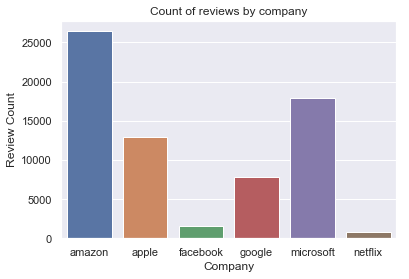

In [26]:
ax = sns.countplot(x="company", data=emp_df)
ax.set_xlabel("Company")
ax.set_ylabel("Review Count")
ax.set_title("Count of reviews by company")

Apple and Microsoft have more than 10K reviews. Facebook and Netflix have less than 2000 reviews. Google has little less than 8K reviews. Amazon tops the charts with more than 25K reviews. The difference between number of Amazon and Netflix reviews is quite high so it is hard to determine if our analysis would be fair and accurate.

Next, let’s see the counts by year.

In [27]:
emp_df['year'] = emp_df.dates.dt.to_period('Y')

In [28]:
emp_df['year'].value_counts()

2017    14075
2018    13676
2016    11490
2015    10140
2014     5941
2013     3859
2012     3210
2011     1710
2008     1365
2010     1130
2009      929
Freq: A-DEC, Name: year, dtype: int64

Text(0, 0.5, 'Count')

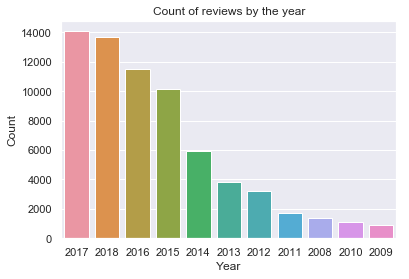

In [29]:
ax = sns.barplot(x=emp_df.year.value_counts().index, y=emp_df.year.value_counts())
ax.set_title("Count of reviews by the year")
ax.set_xlabel("Year")
ax.set_ylabel("Count")

The counts are highest in recent years (2017-18) vs the earlier years (2009-10). One reason for this could be Glassdoor has become more popular over the years and considered more reliable for by employees for posting reviews.

Let's try to plot the overall ratings for all companies on a boxplot and determine the distribution

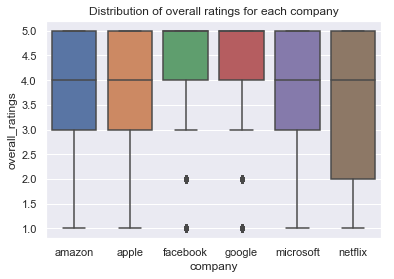

In [30]:
ax = sns.boxplot(x="company", y="overall_ratings", data=emp_df).set_title("Distribution of overall ratings for each company")

The above boxplot shows the distribution of overall ratings for each company. Interestingly, the interquartile range for Facebook and Google is from 4.0 to 5.0 with some outliers. The boxplot is skewed towards the higher values for all companies except Netflix.

Let’s look at a violin plot to find the distribution of culture and values ratings for each company. In a box plot, all the plot components correspond to actual data points whereas a violin plot features a kernel density estimation of the underlying distribution. 

Text(0.5, 1.0, 'Distribution of culture values ratings for each company')

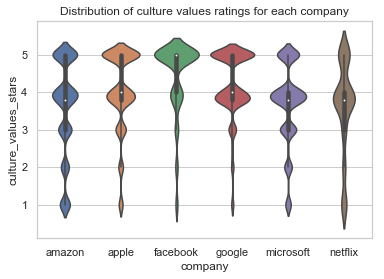

In [36]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
ax = sns.violinplot(x='company', y='culture_values_stars', data=emp_df)
ax.set_title("Distribution of culture values ratings for each company")

In this violin plot, the median is 5 for Facebook and close to 4 for all other companies. The interquartile range is lowest for Microsoft and Netflix.

Now we will draw a lmplot which is a 2D scatterplot with an optional overlaid regression line.
The first lmplot shows the relationship between work_balance_stars and overall_ratings.
The second lmplot shows the relationship between comp_benefit_stars and overall_ratings.

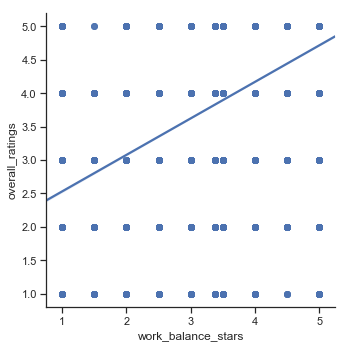

In [37]:
sns.set(style="ticks")
ax = sns.lmplot(x="work_balance_stars", y="overall_ratings", data=emp_df)

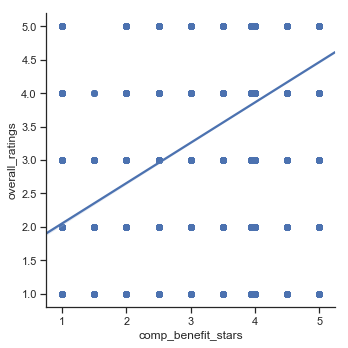

In [33]:
ax = sns.lmplot(x="comp_benefit_stars", y="overall_ratings", data=emp_df)

From the above two charts, we can draw a conclusion that work_balance_stars as well as comp_benefit_stars both have a positive relationship with overall_ratings.

Now let's try to plot a point plot that will show the mean overall ratings for each company

Text(0.5, 1.0, 'Mean overall ratings')

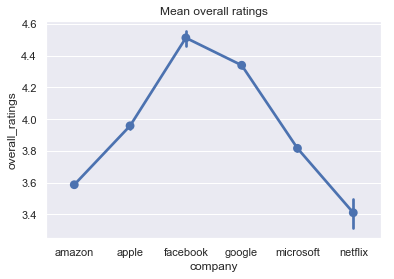

In [34]:
sns.set(style="darkgrid")
ax = sns.pointplot(x="company", y="overall_ratings", data=emp_df)
ax.set_title("Mean overall ratings")

From the above chart it is evident that Facebook received the highest average overall ratings whereas Netflix got the lowest.

Finally, we have a pairplot which will show pairwise relationships between two of our variables. A pairplot allows us to see both the distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis.

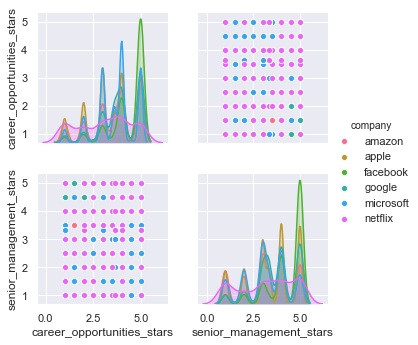

In [35]:
ax = sns.pairplot(emp_df, vars=["career_opportunities_stars", "senior_management_stars"], hue="company", palette="husl")

The histogram on the diagonal shows the distribution of a single variable. The scatter plots on the upper and lower triangles show the relationship between the 2 variables which in this case are senior management stars and career opportunities stars.

The dataset is rich and interesting and can be used to answer a lot of other questions such as:
1.	Do current employees give more reviews than the ex-employees?
2.	Is there a trend between the number of reviews and dates?
3.	Were there a high number of reviews on a particular day?
4.	What is the average overall rating? Which companies have consistently continued to stay above this average?
5.	How do the ratings vary for each company by individual locations?
6.	Trend of ratings using date and location